## medio_aire_auga/set3 (10/10/2023)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from optics import Monochromatic, Angles, Maximums, Transmittance, Index

Representamos os datos sobre os que traballaremos:

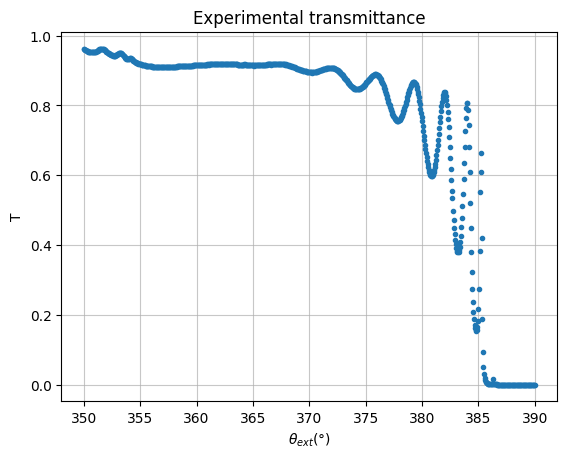

In [3]:
obj = Monochromatic('sources/2023-10-10/set3')


obj._get_transmittance()

T_exp, theta_e = obj.data['b_r_TE']['T']['1']

plt.figure()
plt.plot((theta_e), T_exp, '.')
plt.grid(alpha = 0.7)
plt.title(r'Experimental transmittance')
plt.xlabel(r'$\theta_{ext} (°)$')
plt.ylabel('T')
plt.show()

Recortamos os datos para centrarnos na zona próxima á RTF.

Ángulo crítico aire: 61.516770475134905


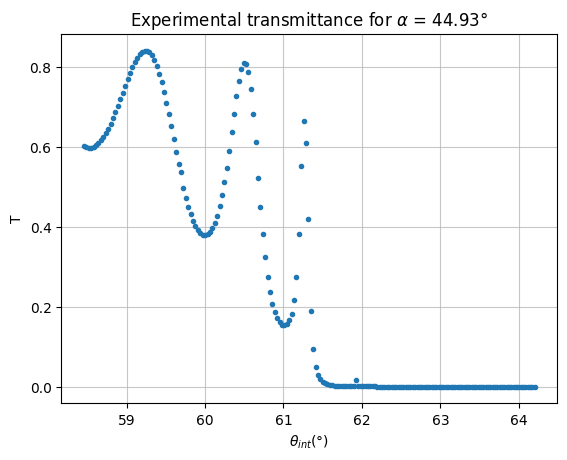

In [4]:
start_value = 380.7

start = Index(theta_e).get_index(start_value)

T_exp = T_exp[:start]
theta_e = theta_e[:start]

theta_ext = theta_e * np.pi/180


alpha =  44.92878787878787 * np.pi/180
wavelength = 0.6328 #HeNe wavelength

theta_int = Angles(alpha = alpha, wavelength = wavelength, theta_ext = theta_ext).int_angle() # [rad]
theta_c = Angles(alpha = alpha, wavelength = wavelength, theta_ext = theta_ext).int_critical_angle(water = True)

print('Ángulo crítico aire:', theta_c * 180/np.pi)

# we shorten the vectors to get the limited range of interest


plt.figure()
plt.plot((theta_int*180/np.pi), T_exp, '.')
plt.grid(alpha = 0.7)
plt.title(r'Experimental transmittance for $\alpha$ = %2.2f°' % (alpha*180/np.pi) )
plt.xlabel(r'$\theta_{int} (°)$')
plt.ylabel('T')
plt.show()


### Cálculo da distancia entre prismas

Usamos os dous picos da dereita para calcular os máximos e a distancia angular relativa entre eles.

In [5]:
values = [60.1,61,61.6]

maximums = []

for i in range(len(values)):
    try:
        _ , angle_1  = Maximums( T = T_exp).interpolation(angles = (theta_int*180/np.pi), 
                                                      value_1 = values[i],value_2 = values[i+1])

        if round(angle_1, 3) not in [round(val, 3) for val in maximums]: 
            maximums.append(angle_1)
    except Exception:
        break

print('Máximos:', maximums)

relat_dist_exp = np.abs(np.diff(maximums)) #[°]

print('Distancia relativa angular:',relat_dist_exp)

Máximos: [60.50796374346273, 61.2614726068097]
Distancia relativa angular: [0.75350886]


Comparamos esa distancia coa que obtemos da gráfica teórica para cada valor da distancia entre prismas entre 1 e 3.5 $\mu$ m.

In [6]:
d = np.linspace(1,3.5,100) * 10**(-6)  #we expect the distance to be near 3 um

min1 = 1000 ; min2 = 1000
possible_d_1 = [] ; possible_d_2 = []
min_vector_1 = [] ; min_vector_2 = []
distances_1 = [] ; distances_2 = []

for dist in d:

    T_teo = Transmittance(dist, alpha, theta_ext, water = True).transmittance()

    maximums = []
    for i in range(len(values)):
        try:
            _ , angle  = Maximums( T = T_teo).interpolation(angles = (theta_int*180/np.pi),
                                                        value_1 = values[i], value_2 = values[i+1])

            if round(angle, 3) not in [round(val, 3) for val in maximums]: 
                maximums.append(angle)
            
        except Exception:
            break
    try:

        relat_dist_teo = np.abs(np.diff(maximums)) #[°]

        min_vector_1.append(abs(relat_dist_exp[0] - relat_dist_teo[0]))
        distances_1.append(dist)

        if abs(relat_dist_exp[0] - relat_dist_teo[0]) < min1:
            min1 = abs(relat_dist_exp[0] - relat_dist_teo[0])
            final_d_1 = dist
    except Exception:
        continue

print('Final distance:', final_d_1 )

Final distance: 3.424242424242424e-06


Representamos a diferencia entre as distancias relativas para cada valor da distancia entre prismas:

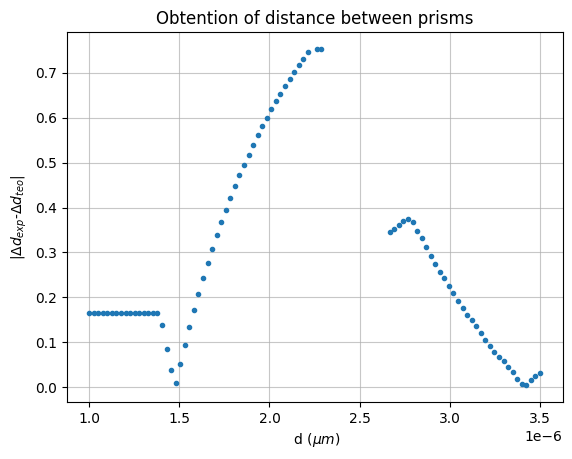

In [7]:
plt.figure()
plt.plot(distances_1, min_vector_1,'.', label='1st maximum')
plt.grid(alpha = 0.7)
plt.title(r'Obtention of distance between prisms' )
plt.xlabel(r' d ($\mu m$)')
plt.ylabel(r'|$\Delta d_{exp}$-$\Delta d_{teo}$|')
plt.show()

Representamos as gráficas teórica e experimental xuntas para ver se coinciden:

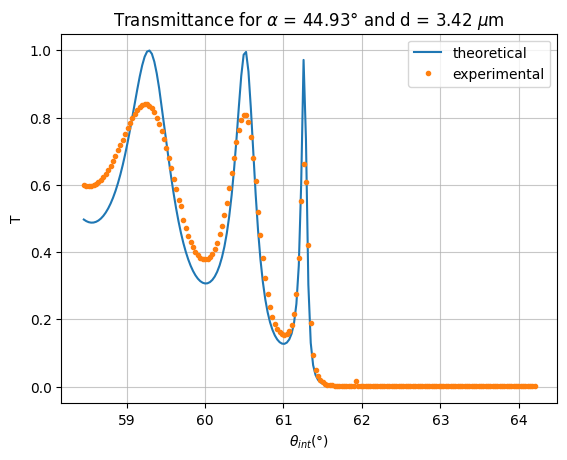

In [8]:
T_teo = Transmittance(final_d_1, alpha, theta_ext, water = True).transmittance()

plt.figure()
plt.plot((theta_int*180/np.pi), T_teo, label='theoretical')
plt.plot((theta_int*180/np.pi), T_exp, '.', label = 'experimental')
plt.grid(alpha = 0.7)
plt.title(r'Transmittance for $\alpha$ = %2.2f° and d = %2.2f $\mu$m' % (alpha*180/np.pi,final_d_1*1e06) )
plt.xlabel(r'$\theta_{int} (°)$')
plt.legend(loc='best')
plt.ylabel('T')
plt.show()

### Cálculo do ángulo do prisma (alpha).

Usamos o mesmo rango e os mesmos picos para calcular o valor de alpha.

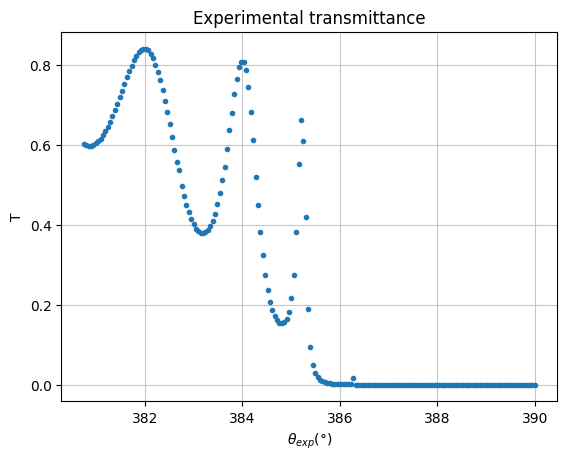

In [9]:
obj = Monochromatic('sources/2023-10-10/set3') 

obj._get_transmittance()

T_exp, theta_e = obj.data['b_r_TE']['T']['1']

start_value =  380.7

start = Index(theta_e).get_index(start_value)

T_exp = T_exp[:start]
theta_e = theta_e[:start]

theta_ext = theta_e * np.pi/180

plt.figure()
plt.plot((theta_e), T_exp, '.')
plt.grid(alpha = 0.7)
plt.title(r'Experimental transmittance')
plt.xlabel(r'$\theta_{exp} (°)$')
plt.ylabel('T')
plt.show()

Atopamos os valores máximos de $T_{exp}$ asociados aos dous picos da dereita xa que eses valores non dependen nin do ángulo alpha nin da distancia entre prismas.

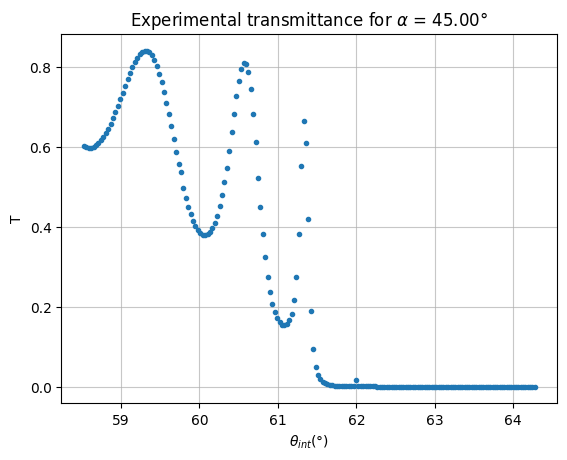

Maximum values of T for experimental graph: [0.809785480029893, 0.6656755868713841]


In [10]:
wavelength = 0.6328
distance = 3.424242424242424e-06
alpha = 45 * np.pi/180 #arbitrary prism's angle to find maximums


theta_int = Angles(alpha = alpha, wavelength = wavelength, theta_ext = theta_ext).int_angle() # [rad]


# experimental maximums 

plt.figure()
plt.plot((theta_int * 180/np.pi) ,T_exp,'.')
plt.grid(alpha=0.7)
plt.title(r'Experimental transmittance for $\alpha$ = %2.2f°' % (alpha*180/np.pi))
plt.xlabel(r'$\theta_{int} (°)$')
plt.ylabel('T')
plt.show()

values = [60.1,61,61.6]

maximums = []
max_indexes = []

for i in range(len(values)):
    try:
        obj_max_exp = Maximums( T = T_exp)
        T_max_exp , _  = obj_max_exp.interpolation(angles = (theta_int*180/np.pi), 
                                                    value_1 = values[i], value_2 = values[i+1])
        index = obj_max_exp.T_max_index
        if T_max_exp not in [val for val in maximums]: 
            maximums.append(T_max_exp)
        if index not in [val for val in max_indexes]:
            max_indexes.append(index)
    
    except Exception:
        break

print('Maximum values of T for experimental graph:', maximums)



Agora buscamos eses mesmos valores para $T_{teo}$.

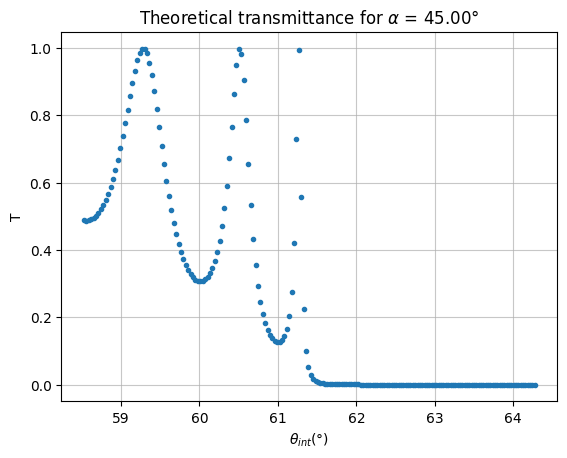

Maximum values of T for theoretical graph: [0.999759832444976, 0.9994816050585003]


In [11]:

T_teo = Transmittance(distance, alpha, theta_ext, water = True).transmittance()

plt.figure()
plt.plot((theta_int*180/np.pi), T_teo, '.')
plt.grid(alpha = 0.7)
plt.title(r'Theoretical transmittance for $\alpha$ = %2.2f°' % (alpha*180/np.pi) )
plt.xlabel(r'$\theta_{int} (°)$')
plt.ylabel('T')
plt.show()


maximums_teo = []
max_indexes_teo = []

for i in range(len(values)):
    try:
        obj_max_teo = Maximums( T = T_teo)
        T_max_teo , _  = obj_max_teo.interpolation(angles = (theta_int*180/np.pi), 
                                                    value_1 = values[i], value_2 = values[i+1])
        index_teo = obj_max_teo.T_max_index
        if T_max_teo not in [val for val in maximums_teo]: 
            maximums_teo.append(T_max_teo)
        if index_teo not in [val for val in max_indexes_teo]:
            max_indexes_teo.append(index_teo)
    
    except Exception:
        break


print('Maximum values of T for theoretical graph:', maximums_teo)


Agora a partir deses valores máximos de T atopamos o ángulo $\theta_{int}$ asociado a cada un deles para poder comparar o da gráfica experimental co da teórica variando alpha nun intervalo entre 44.3° e 45.8°.

In [12]:

a = np.linspace(44.3, 45.8, 100) * np.pi/180

min1 = 1000
min2 = 1000

for alpha in a:

    theta_int = Angles(alpha = alpha, wavelength = wavelength, 
                   theta_ext = theta_ext).int_angle() # [rad]
    i_1, i_2  = max_indexes
    i_1_exp = Index(T_exp).get_delimited_index(maximums[0], i_1) #the inferior maximum is bivaluated
    i_2_exp =  Index(T_exp).get_delimited_index(maximums[1], i_2)

    angle_1_exp = (theta_int[i_1_exp]* 180/np.pi) #highest value of theta_int
    angle_2_exp = (theta_int[i_2_exp]* 180/np.pi)


    T_teo = Transmittance(distance, alpha, theta_ext, water = True).transmittance()

    ind_1, ind_2 = max_indexes_teo

    i_2_teo = Index(T_teo).get_delimited_index(maximums_teo[0],ind_1)
    i_1_teo = Index(T_teo).get_delimited_index(maximums_teo[1],ind_2)
    
    angle_1_teo = (theta_int[i_2_teo]* 180/np.pi)
    angle_2_teo = (theta_int[i_1_teo]* 180/np.pi)


    if abs(angle_1_exp-angle_1_teo) < min1: 
        final_a_1 = alpha
        min1 = abs(angle_1_exp-angle_1_teo)
    else:
        pass

    if abs(angle_2_exp-angle_2_teo) < min2:
        final_a_2 = alpha
        min2 = abs(angle_2_exp-angle_2_teo)
    else:
        pass

print('Valor de alpha para o primeiro pico:', final_a_1*180/np.pi)
print('Valor de alpha para o segundo pico:',final_a_2*180/np.pi)

print('Media: ', (final_a_1*180/np.pi+final_a_2*180/np.pi)/2)


Valor de alpha para o primeiro pico: 44.93636363636363
Valor de alpha para o segundo pico: 44.92121212121212
Media:  44.92878787878787


In [13]:

a = np.linspace(44.3, 45.8, 100) * np.pi/180

min1 = 1000
min2 = 1000

for alpha in a:

    theta_int = Angles(alpha = alpha, wavelength = wavelength, 
                   theta_ext = theta_ext).int_angle() # [rad]
    i_1, i_2  = max_indexes
    i_1_exp = Index(T_exp).get_delimited_index(maximums[0], i_1) #the inferior maximum is bivaluated
    i_2_exp =  Index(T_exp).get_delimited_index(maximums[1], i_2)

    angle_1_exp = (theta_int[i_1_exp]* 180/np.pi) #highest value of theta_int
    angle_2_exp = (theta_int[i_2_exp]* 180/np.pi)


    T_teo = Transmittance(distance, alpha, theta_ext, water = True).transmittance()

    ind_1, ind_2 = max_indexes_teo

    i_2_teo = Index(T_teo).get_delimited_index(maximums_teo[0],ind_1)
    i_1_teo = Index(T_teo).get_delimited_index(maximums_teo[1],ind_2)
    
    angle_1_teo = (theta_int[i_2_teo]* 180/np.pi)
    angle_2_teo = (theta_int[i_1_teo]* 180/np.pi)


    if abs(angle_1_exp-angle_1_teo) < min1: 
        final_a_1 = alpha
        min1 = abs(angle_1_exp-angle_1_teo)
    else:
        pass

    if abs(angle_2_exp-angle_2_teo) < min2:
        final_a_2 = alpha
        min2 = abs(angle_2_exp-angle_2_teo)
    else:
        pass

print('Valor de alpha para o primeiro pico:', final_a_1*180/np.pi)
print('Valor de alpha para o segundo pico:',final_a_2*180/np.pi)

print('Media: ', (final_a_1*180/np.pi+final_a_2*180/np.pi)/2)


Valor de alpha para o primeiro pico: 44.93636363636363
Valor de alpha para o segundo pico: 44.92121212121212
Media:  44.92878787878787


Representamos as gráficas xuntas para ver se coincides:

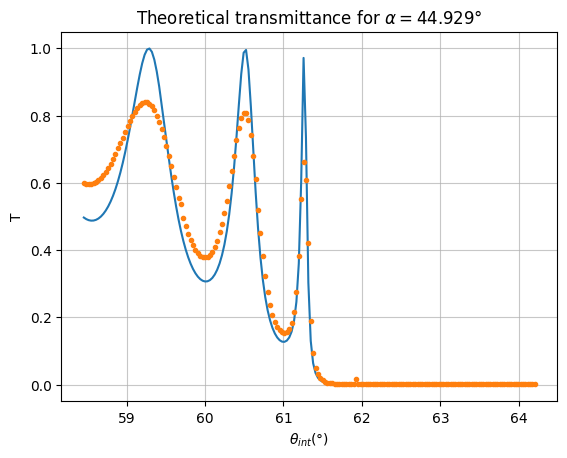

In [14]:
mean = (final_a_1+final_a_2)/2

T_teo = Transmittance(distance, mean, theta_ext, water = True).transmittance()
theta_int = Angles(alpha = mean, wavelength = wavelength, theta_ext = theta_ext).int_angle() # [rad]

plt.figure()
plt.plot((theta_int*180/np.pi),T_teo, label = 'teo')
plt.plot((theta_int*180/np.pi),T_exp,'.', label = 'exp')
plt.grid(alpha=0.7)
plt.title(r'Theoretical transmittance for $\alpha = %1.3f°$' % (mean*180/np.pi))
plt.xlabel(r'$\theta_{int} (°)$')
plt.ylabel('T')
plt.show()